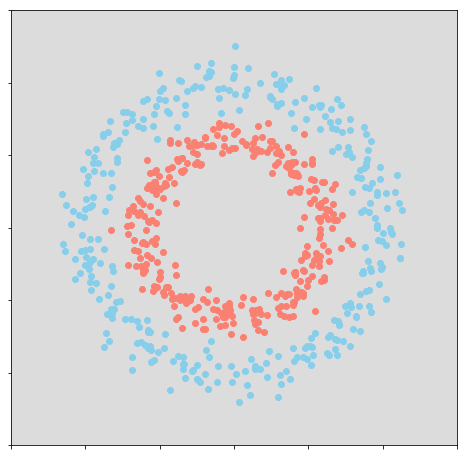

In [27]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

# Creamos nuestros datos artificiales, donde buscaremos clasificar 
# dos anillos concéntricos de datos. 
X, Y = make_circles(n_samples=650, factor=0.6, noise=0.08)

# Resolución del mapa de predicción.
res = 100 

# Coordendadas del mapa de predicción.
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

# Input con cada combo de coordenadas del mapa de predicción.
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

# Objeto vacio a 0.5 del mapa de predicción.
_pY = np.zeros((res, res)) + 0.5

# Visualización del mapa de predicción.
plt.figure(figsize=(8, 8))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)

# Visualización de la nube de datos.
plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

plt.tick_params(labelbottom=False, labelleft=False)

plt.show()

In [6]:
import tensorflow as tf

from matplotlib import animation
from IPython.core.display import display, HTML

In [13]:
# Definimos los puntos de entrada de la red, para la matriz X e Y.
#A las entradas/salidas de una red se las conoce como PLACE-HOLDER
#El "None" implica que el tamaño no esta especificado
iX = tf.placeholder('float', shape=[None, X.shape[1]])
iY = tf.placeholder('float', shape=[None])





In [15]:
#DECLARACIONES DE CAPAS

lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa. Esto seria la arquitectura en si

#En cada capa hay que especificar cuales son los PARAMETROS a entrenar, se los conoce como .Variable
#Su inicializacion, "random_normal" es decir aleatorias, por ejemplo. Sus conecciones entrada/salida
#Es decir nn[0] indica que las entradas de la matriz de pesos van a ser 2 y el nn[1] indica que van a ser 16
#Por que 2 y 16? Porque esta puesto mas arriba
#Y luego un identificador

#Finalmente en cada capa hay que definir la OPERACION que hace la capa, eso es la l.
#Por ejemplo en la capa 1 la operacion es asi:
#A la entrada ix se la multiplica (matmul) por la matriz W1 y se le suma el bias b1. Y luego se le aplica
#la funcion de activacion relu, listo, ya tenes la salida de la capa 1, es decir l1.
# Capa 1
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='Weights_1')
b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')

l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))

# Capa 2
W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name='Weights_2')
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')

l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

# Capa 3
W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name='Weights_3')
b3 = tf.Variable(tf.random_normal([nn[3]]), name='bias_3')

pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:, 0]
#Como la capa 3 es la de salida, en vez de l3 ya directamente puse pY.
#Aqui notese que puse la sigmoide en vez de la ReLU

In [16]:
#PARAMETROS PARA EL ENTRENAMIENTO

# Evaluación de las predicciones. Con esto digo que la funcion error es el error cuadratico medio
#y se calcula con la diferencia entre la salida de la red (pY) y el placeholder iY (datos de salida de entrenamiento)
loss = tf.losses.mean_squared_error(pY, iY)

# Definimos al optimizador de la red, para que minimice el error.
#Con esto se decide usar el descenzo del gradiente como metodo de reducir el coste, o sea de entrenar
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)

n_steps = 1000 # Número de ciclos de entrenamiento. Esto serian las EPOCHS

iPY = [] # Aquí guardaremos la evolución de las predicción, para la animación. Em.. seh

Instructions for updating:
Use tf.cast instead.


Step 0 / 1000 - Loss =  0.37978315 - Acc = 0.5584615384615385
Step 25 / 1000 - Loss =  0.36102468 - Acc = 0.583076923076923
Step 50 / 1000 - Loss =  0.33960804 - Acc = 0.6123076923076923
Step 75 / 1000 - Loss =  0.32010812 - Acc = 0.6338461538461538
Step 100 / 1000 - Loss =  0.29295596 - Acc = 0.6661538461538462
Step 125 / 1000 - Loss =  0.2538069 - Acc = 0.6907692307692308
Step 150 / 1000 - Loss =  0.2102586 - Acc = 0.7
Step 175 / 1000 - Loss =  0.18479666 - Acc = 0.7107692307692308
Step 200 / 1000 - Loss =  0.17152825 - Acc = 0.7523076923076923
Step 225 / 1000 - Loss =  0.16244729 - Acc = 0.7738461538461539
Step 250 / 1000 - Loss =  0.15502301 - Acc = 0.803076923076923
Step 275 / 1000 - Loss =  0.14879638 - Acc = 0.8184615384615385
Step 300 / 1000 - Loss =  0.14329588 - Acc = 0.8415384615384616
Step 325 / 1000 - Loss =  0.13828331 - Acc = 0.8723076923076923
Step 350 / 1000 - Loss =  0.13364583 - Acc = 0.8938461538461538
Step 375 / 1000 - Loss =  0.12935117 - Acc = 0.9030769230769231


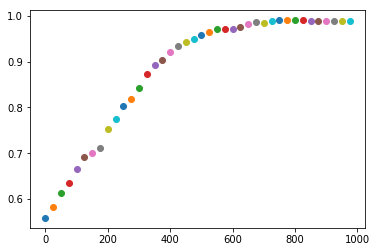

In [46]:
#ENTRENAMIENTO 

with tf.Session() as sess: #para entrenar se debe crear una session
  
  # Inicializamos todos los parámetros de la red, las matrices W y b.
  sess.run(tf.global_variables_initializer())
    
  # Iteramos n pases de entrenamiento.
  for step in range(n_steps):
  
    # Evaluamos al optimizador, a la función de coste y al tensor de salida pY. 
    # La evaluación del optimizer producirá el entrenamiento de la red.
    #Esta es la linea de codigo MAS IMPORTANTE DE TODO EL CODIGO
    #Basicamente se evaluan esos tres tensores y se guardan en (_, _loss y en _pY)
    #para que se evaluen es necesario contar con datos como los placeholders X e Y
    #que se entregan con el parametro "feed_dict"
    #El simple hecho de que se evalue el optimizer es lo que hace que se vaya entrenando
    _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={ iX : X, iY : Y })
    
    # Cada 25 iteraciones, imprimimos métricas.
    if step % 25 == 0: 
      
      # Cálculo del accuracy.
      acc = np.mean(np.round(_pY) == Y)
      
      # Impresión de métricas.
      print('Step', step, '/', n_steps, '- Loss = ', _loss, '- Acc =', acc)
        
      plt.plot(step, acc, "o")
    # Obtenemos predicciones para cada punto de nuestro mapa de predicción _pX.
    _pY = sess.run(pY, feed_dict={ iX : _pX }).reshape((res, res))

    # Y lo guardamos para visualizar la animación.
    iPY.append(_pY)
    
        
        


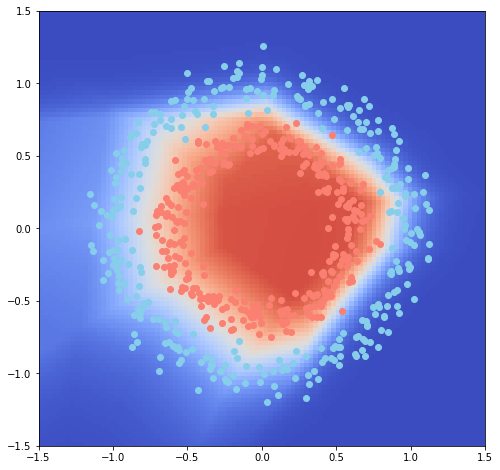

In [51]:
#VISUALIZACION DE LOS DATOS
plt.figure(figsize=(8, 8))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)

# Visualización de la nube de datos.
plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")
plt.show()

In [52]:
_pY.shape

(100, 100)